In [1]:
import pandas as pd            # For data manipulation
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns          # For advanced visualization
import requests                # For web scraping
from bs4 import BeautifulSoup  # For parsing HTML

In [2]:
# Install the library (run once)
!pip install textblob

# Import it
from textblob import TextBlob

  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.8 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.0 MB/s  0:00:00

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [click]
   ---------- ----------------------------- 1/4 [click]
   ---------- ----------------------------- 1/4 [click]
   -------------------- ------------------- 2/4 [nltk]
   


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 1. Connect to the site
url = "http://quotes.toscrape.com"
response = requests.get(url)

# 2. Parse the content
soup = BeautifulSoup(response.text, 'html.parser')

# 3. Extract data (Find all quotes)
quotes = [q.text for q in soup.find_all('span', class_='text')]
authors = [a.text for a in soup.find_all('small', class_='author')]

# 4. Create the DataFrame
df = pd.DataFrame({'Quote': quotes, 'Author': authors})

In [ ]:
Create a Sentiment Function

In [ ]:
: Sentiment Analysis

In [5]:
def analyze_quote_sentiment(text):
    analysis = TextBlob(text)
    # analysis.sentiment.polarity gives a number between -1 and 1
    return analysis.sentiment.polarity

print("Sentiment function created!")

Sentiment function created!


In [ ]:

Apply Analysis to your Dataframe

In [6]:
# 1. Create a column for the numerical score
df['Polarity_Score'] = df['Quote'].apply(analyze_quote_sentiment)

# 2. Create a column for the text label
def get_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Polarity_Score'].apply(get_label)

# View the results
df[['Quote', 'Sentiment_Label', 'Polarity_Score']].head()

,Quote,Sentiment_Label,Polarity_Score
0,“The world as we have created it is a process ...,Neutral,0.000000
1,"“It is our choices, Harry, that show what we t...",Positive,0.300000
2,“There are only two ways to live your life. On...,Positive,0.003788
3,"“The person, be it gentleman or lady, who has ...",Negative,-0.050000
4,"“Imperfection is beauty, madness is genius and...",Negative,-0.277778


In [ ]:
Visualize the Results

C:\Users\csaaj\AppData\Local\Temp\ipykernel_16492\3640317420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=df, palette='RdYlGn') # Red, Yellow, Green palette


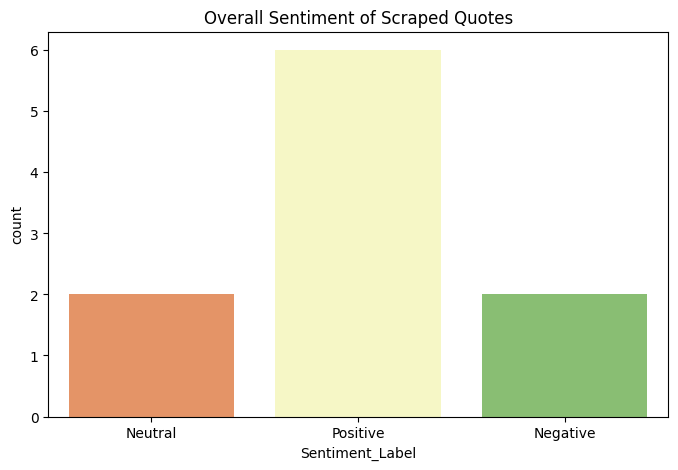

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment_Label', data=df, palette='RdYlGn') # Red, Yellow, Green palette
plt.title('Overall Sentiment of Scraped Quotes')
plt.show()